In [1]:
# Load basic libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import iris data
data = pd.read_csv("/content/sample_data/iris.csv")

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# Featureset creation
X = data.drop('variety', axis=1).values

# Standardize the features
XStandardized = StandardScaler().fit_transform(X)

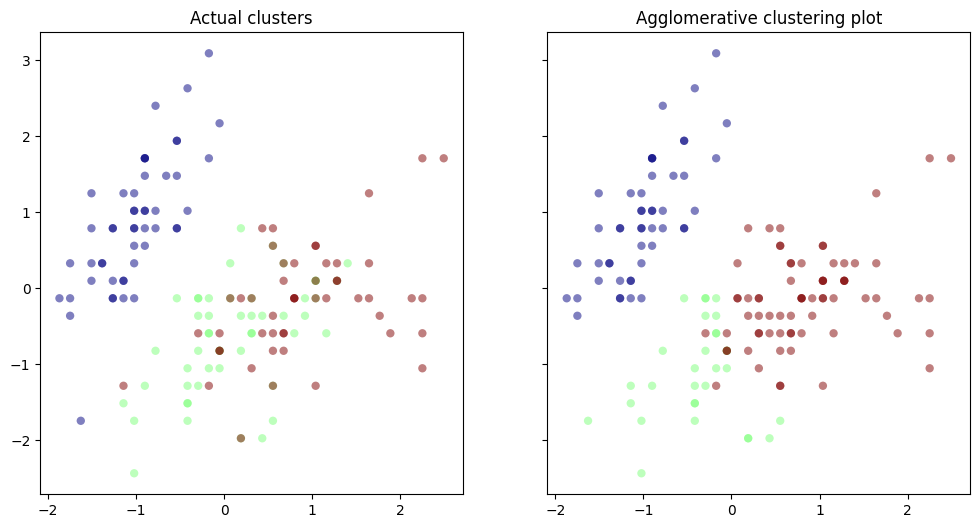

In [5]:
# HAC (Hierarchical agglomerative clustering)
from sklearn.cluster import AgglomerativeClustering
hacPred = AgglomerativeClustering(n_clusters = 3)
yHac = hacPred.fit_predict(XStandardized)

# Prepare the variety mapping for the actual clusters
varietyMapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
varietyNumeric = data["variety"].map(varietyMapping)
hacToActualMapping = {0: 2, 1: 0, 2: 1}

# Map the HAC predictions to match the actual cluster colors
yHacMapped = np.array([hacToActualMapping[label] for label in yHac])

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot actual clusters
sc1 = ax1.scatter(XStandardized[:, 0], XStandardized[:, 1], c=varietyNumeric, cmap="jet", edgecolor="None", alpha=0.5)
ax1.set_title("Actual clusters")

# Plot HAC clusters
sc2 = ax2.scatter(XStandardized[:, 0], XStandardized[:, 1], c=yHacMapped, cmap="jet", edgecolor="None", alpha=0.5)
ax2.set_title("Agglomerative clustering plot")

plt.show()

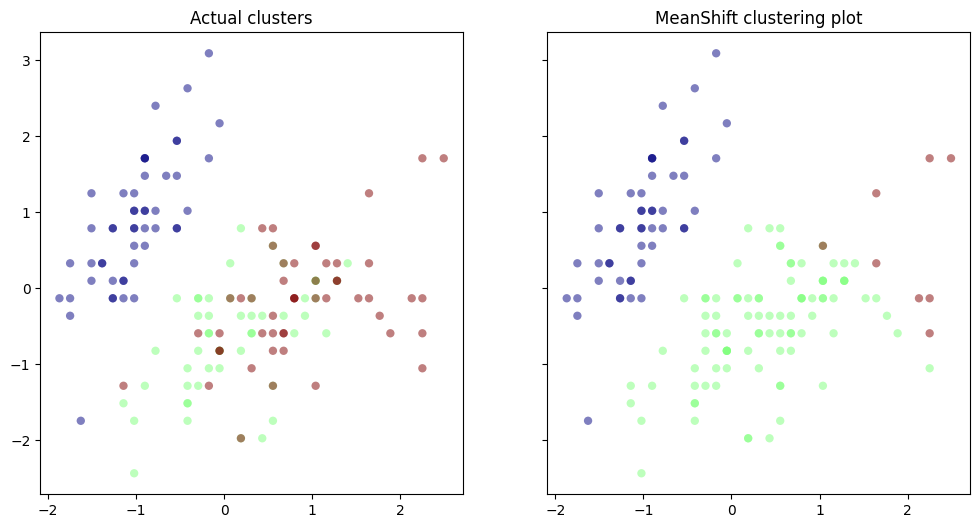

In [6]:
# Meanshift clustering
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate bandwidth for MeanShift
bandwidth = estimate_bandwidth(XStandardized, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
yMS = ms.fit_predict(XStandardized)

# Prepare the variety mapping for the actual clusters
varietyMapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
varietyNumeric = data["variety"].map(varietyMapping)
msToActualMapping = {0: 1, 1: 0, 2: 2}

# Map the MeanShift predictions
yMSMapped = np.array([msToActualMapping[label] for label in yMS])

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot actual clusters
sc1 = ax1.scatter(XStandardized[:, 0], XStandardized[:, 1], c=varietyNumeric, cmap="jet", edgecolor="None", alpha=0.5)
ax1.set_title("Actual clusters")

# Plot MeanShift clusters with adjusted colors
sc2 = ax2.scatter(XStandardized[:, 0], XStandardized[:, 1], c=yMSMapped, cmap="jet", edgecolor="None", alpha=0.5)
ax2.set_title("MeanShift clustering plot")

plt.show()

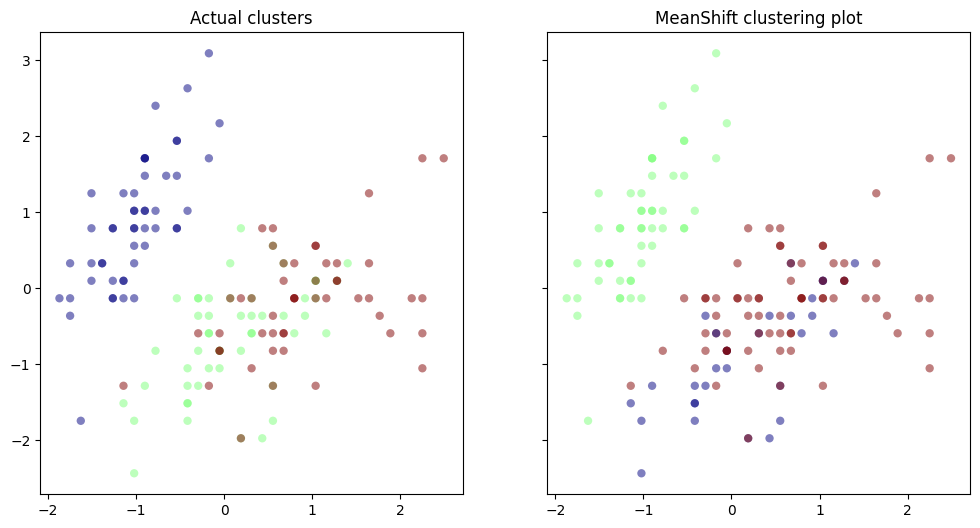

In [7]:
# Guassian mixture with variation inference (VI) clustering
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 3, covariance_type = "full").fit_predict(X)

# Prepare the variety mapping for the actual clusters
varietyMapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
varietyNumeric = data["variety"].map(varietyMapping)
bgmToActualMapping = {0: 0, 1: 1, 2: 2}

# Map the BGM predictions
yBgmMapped = np.array([bgmToActualMapping[label] for label in bgm])

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot actual clusters
sc1 = ax1.scatter(XStandardized[:, 0], XStandardized[:, 1], c=varietyNumeric, cmap="jet", edgecolor="None", alpha=0.5)
ax1.set_title("Actual clusters")

# Plot BGM clusters with adjusted colors
sc2 = ax2.scatter(XStandardized[:, 0], XStandardized[:, 1], c=yBgmMapped, cmap="jet", edgecolor="None", alpha=0.5)
ax2.set_title("MeanShift clustering plot")

plt.show()